<a href="https://colab.research.google.com/github/VidushiBhatia/Customer-Segmentation/blob/main/Customer%20Segmentation%20-%20Complete%20Data%20Science%20Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation - Data Preparation

## 1. Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Objective:

The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders. For more information, see the blog post accompanying its public release.

[Original Blog Post from InstaCart](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

## 2. Exploratory Data Analysis
Before we create a data-driven solution, we'll first understand what does the data consist of:
   * Read all the files
   * Look at columns and get a sense of which table has what and how it could be used - note these are just hypothesis - might be changing the use of each table as I go along
   * Look at summaries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
############################################ Helper Function 1 ############################################################
############################################### READ FILES ################################################################

def read_data(path):
  all_dfs = {}
  df = pd.DataFrame()
  files = os.listdir(path) 
  missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","-"]
  
  for file in files:
    if file.endswith('.csv'):
      all_dfs[file[:file.find(".")]] = pd.read_csv(os.path.join(path,file), na_values = missing_value_formats)
  return all_dfs

############################################ Helper Function 2 ############################################################
############################################ SUMMARIZE FILES ##############################################################

def summarize_data(df):
  print("\nOverview")
  display(df.head())
  print("\nSummary")
  display(df.describe(include='all'))
  print("\nNull Values")
  display(df.isnull().sum())

### CHECK AND ADD NULL VALUES - MISSING VALUE TREATMENT

In [4]:
# # Understand the available data

# path = '/content/drive/MyDrive/instacart-market-basket-analysis/'
# all_dfs = read_data(path)

# print("\n############################## AISLES ##############################")
# summarize_data(all_dfs['aisles'])
# print("\n############################## DEPARTMENTS ##############################")
# summarize_data(all_dfs['departments'])
# print("\n############################## ORDER-PRODUCTS PRIOR ##############################")
# summarize_data(all_dfs['order_products__prior'])
# print("\n############################## ORDER-PRODUCTS TRAIN ##############################")
# summarize_data(all_dfs['order_products__train'])
# print("\n############################## ORDERS ##############################")
# summarize_data(all_dfs['orders'])
# print("\n############################## PRODUCTS ##############################")
# summarize_data(all_dfs['products'])
# print("\n############################## SAMPLE SUBMISSION ##############################")
# summarize_data(all_dfs['sample_submission'])



############################## AISLES ##############################

Overview


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



Summary


,aisle_id,aisle
count,134.000000,134
unique,NaN,134
top,NaN,lunch meat
freq,NaN,1
mean,67.500000,NaN
std,38.826537,NaN
min,1.000000,NaN
25%,34.250000,NaN
50%,67.500000,NaN
75%,100.750000,NaN



Null Values


aisle_id    0
aisle       0
dtype: int64


############################## DEPARTMENTS ##############################

Overview


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



Summary


,department_id,department
count,21.000000,21
unique,NaN,21
top,NaN,alcohol
freq,NaN,1
mean,11.000000,NaN
std,6.204837,NaN
min,1.000000,NaN
25%,6.000000,NaN
50%,11.000000,NaN
75%,16.000000,NaN



Null Values


department_id    0
department       0
dtype: int64


############################## ORDER-PRODUCTS PRIOR ##############################

Overview


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



Summary


,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00



Null Values


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


############################## ORDER-PRODUCTS TRAIN ##############################

Overview


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



Summary


,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00



Null Values


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


############################## ORDERS ##############################

Overview


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



Summary


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3421083,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,3214874,NaN,NaN,NaN,NaN
mean,1.710542e+06,1.029782e+05,NaN,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,NaN,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,NaN,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,NaN,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,NaN,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01



Null Values


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


############################## PRODUCTS ##############################

Overview


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



Summary


,product_id,product_name,aisle_id,department_id
count,49688.000000,49688,49688.000000,49688.000000
unique,NaN,49688,NaN,NaN
top,NaN,Organic Aged Earl Grey Tea,NaN,NaN
freq,NaN,1,NaN,NaN
mean,24844.500000,NaN,67.769582,11.728687
std,14343.834425,NaN,38.316162,5.850410
min,1.000000,NaN,1.000000,1.000000
25%,12422.750000,NaN,35.000000,7.000000
50%,24844.500000,NaN,69.000000,13.000000
75%,37266.250000,NaN,100.000000,17.000000



Null Values


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


############################## SAMPLE SUBMISSION ##############################

Overview


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259



Summary


,order_id,products
count,7.500000e+04,75000
unique,NaN,1
top,NaN,39276 29259
freq,NaN,75000
mean,1.709686e+06,NaN
std,9.878542e+05,NaN
min,1.700000e+01,NaN
25%,8.557232e+05,NaN
50%,1.710152e+06,NaN
75%,2.562794e+06,NaN



Null Values


order_id    0
products    0
dtype: int64

I have created a table below explaining my understanding of the datasets and also proposed hypothesis or metrics or questions that we can solve for. hypothesis here means that I think these metrics might have an impact on our objective function i.e. probability to reorder

### ADD PICTURE OF TABLE HERE INSTEAD - RENAME TABLES

| Table Name | Column Names | Description | Hypothesis for Data Exploration  |
| --- | --- | --- | --- | 
| df_aisles | aisle_id, aisle | 134 unique IDs, names for different aisles at Instacart | aisle which generates highest revenue, most frequently used aisle, distribution of aisle usage based on demographics and other customer info, is there a trend of aisle popularity with time of day, day of week, or any specific month of year? |
| df_dept | department_id, department | 21 unique IDs, names for different departments including 'missing' - looks like the rolled-up metric for aisles e.g. one department might have multiple aisles | revenue by dept, frequency of use by dept, distribution of dept usage based on demographics and other available customer info, dept popularity by time of day, day of week, or any specific month of year  |
| df_prior_orders | order_id, product_id, add_to_cart_order, reordered | 32,434,489 rows at order-product level with 3,214,874 unique orders for 49,677 unique products. 'add_to_cart_order' shows the order in which they were added to the cart and 'reordered' | most ordered products, most frequent re-ordered products, products which are only ordered once and not reordered, Number of products in one order, are the products that are ordered together from the same aisle/dept? |
 | df_orders_train | order_id, product_id, add_to_cart_order, reordered | Similar to df_prior_orders but only has latest order information. 1,384,617 rows with 131,209 unique order IDs and 39,123  | most ordered products, most frequent re-ordered products, products which are only ordered once and not reordered, Number of products in one order, are the products that are ordered together from the same aisle/dept? |
| df_orders | order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order | 3,421,083 orders showing information on order ID, user ID, which evaluation dataset the order is in (prior, train, test), day of week, hour of day, days since prior order | Most popular day & time for placing an order, trend of day & time by products |
| df_products | product_id, product_name, aisle_id, department_id | 49,688 rows mapping products to aisles and departments |	covered in above metrics |


### MAKE A POWERPOINT VISUALIZATION TO SHOW HOW TO MERGE

In [2]:
# MERGE DATA

prior_train_orders = pd.concat([all_dfs['order_products__prior'], all_dfs['order_products__train']]).sort_values(by=['order_id'])


prior_train_orders = pd.merge(left = prior_train_orders, right = all_dfs['products'],
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_train_orders = pd.merge(left = prior_train_orders, right = all_dfs['aisles'],
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
# prior_train_orders = pd.merge(left = prior_train_orders, right = all_dfs['departments'],
#                              left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
# prior_train_orders = pd.merge(left = prior_train_orders, right = all_dfs['orders'],
#                              left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

# col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
#  'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day',
#  'days_since_prior_order']

# prior_train_orders = prior_train_orders[col_order]
prior_train_orders

NameError: ignored

In [16]:
prior_train_orders['aisle_id'].nunique()

49685

In [ ]:
# STEP 3: look at charts and summaries

def CreateCharts (ax, data, x, y, chart_type, legend = False, size = 5, hue = None, palette=None):
    if chart_type == "scatter":
        plot = sns.scatterplot(data=data, x=x, y=y, size=size, legend=legend, 
                hue=hue, sizes=(20, 200), palette = palette, ax=ax)
    elif chart_type == "bar":
        plot = sns.barplot(x=x, y=y, data=data, 
                hue=hue, palette = palette, ax=ax)
    elif chart_type == "density":
        plot = sns.kdeplot(x=x, data=data, 
                shade=True, alpha=0.5, ax=ax)        
    return plot

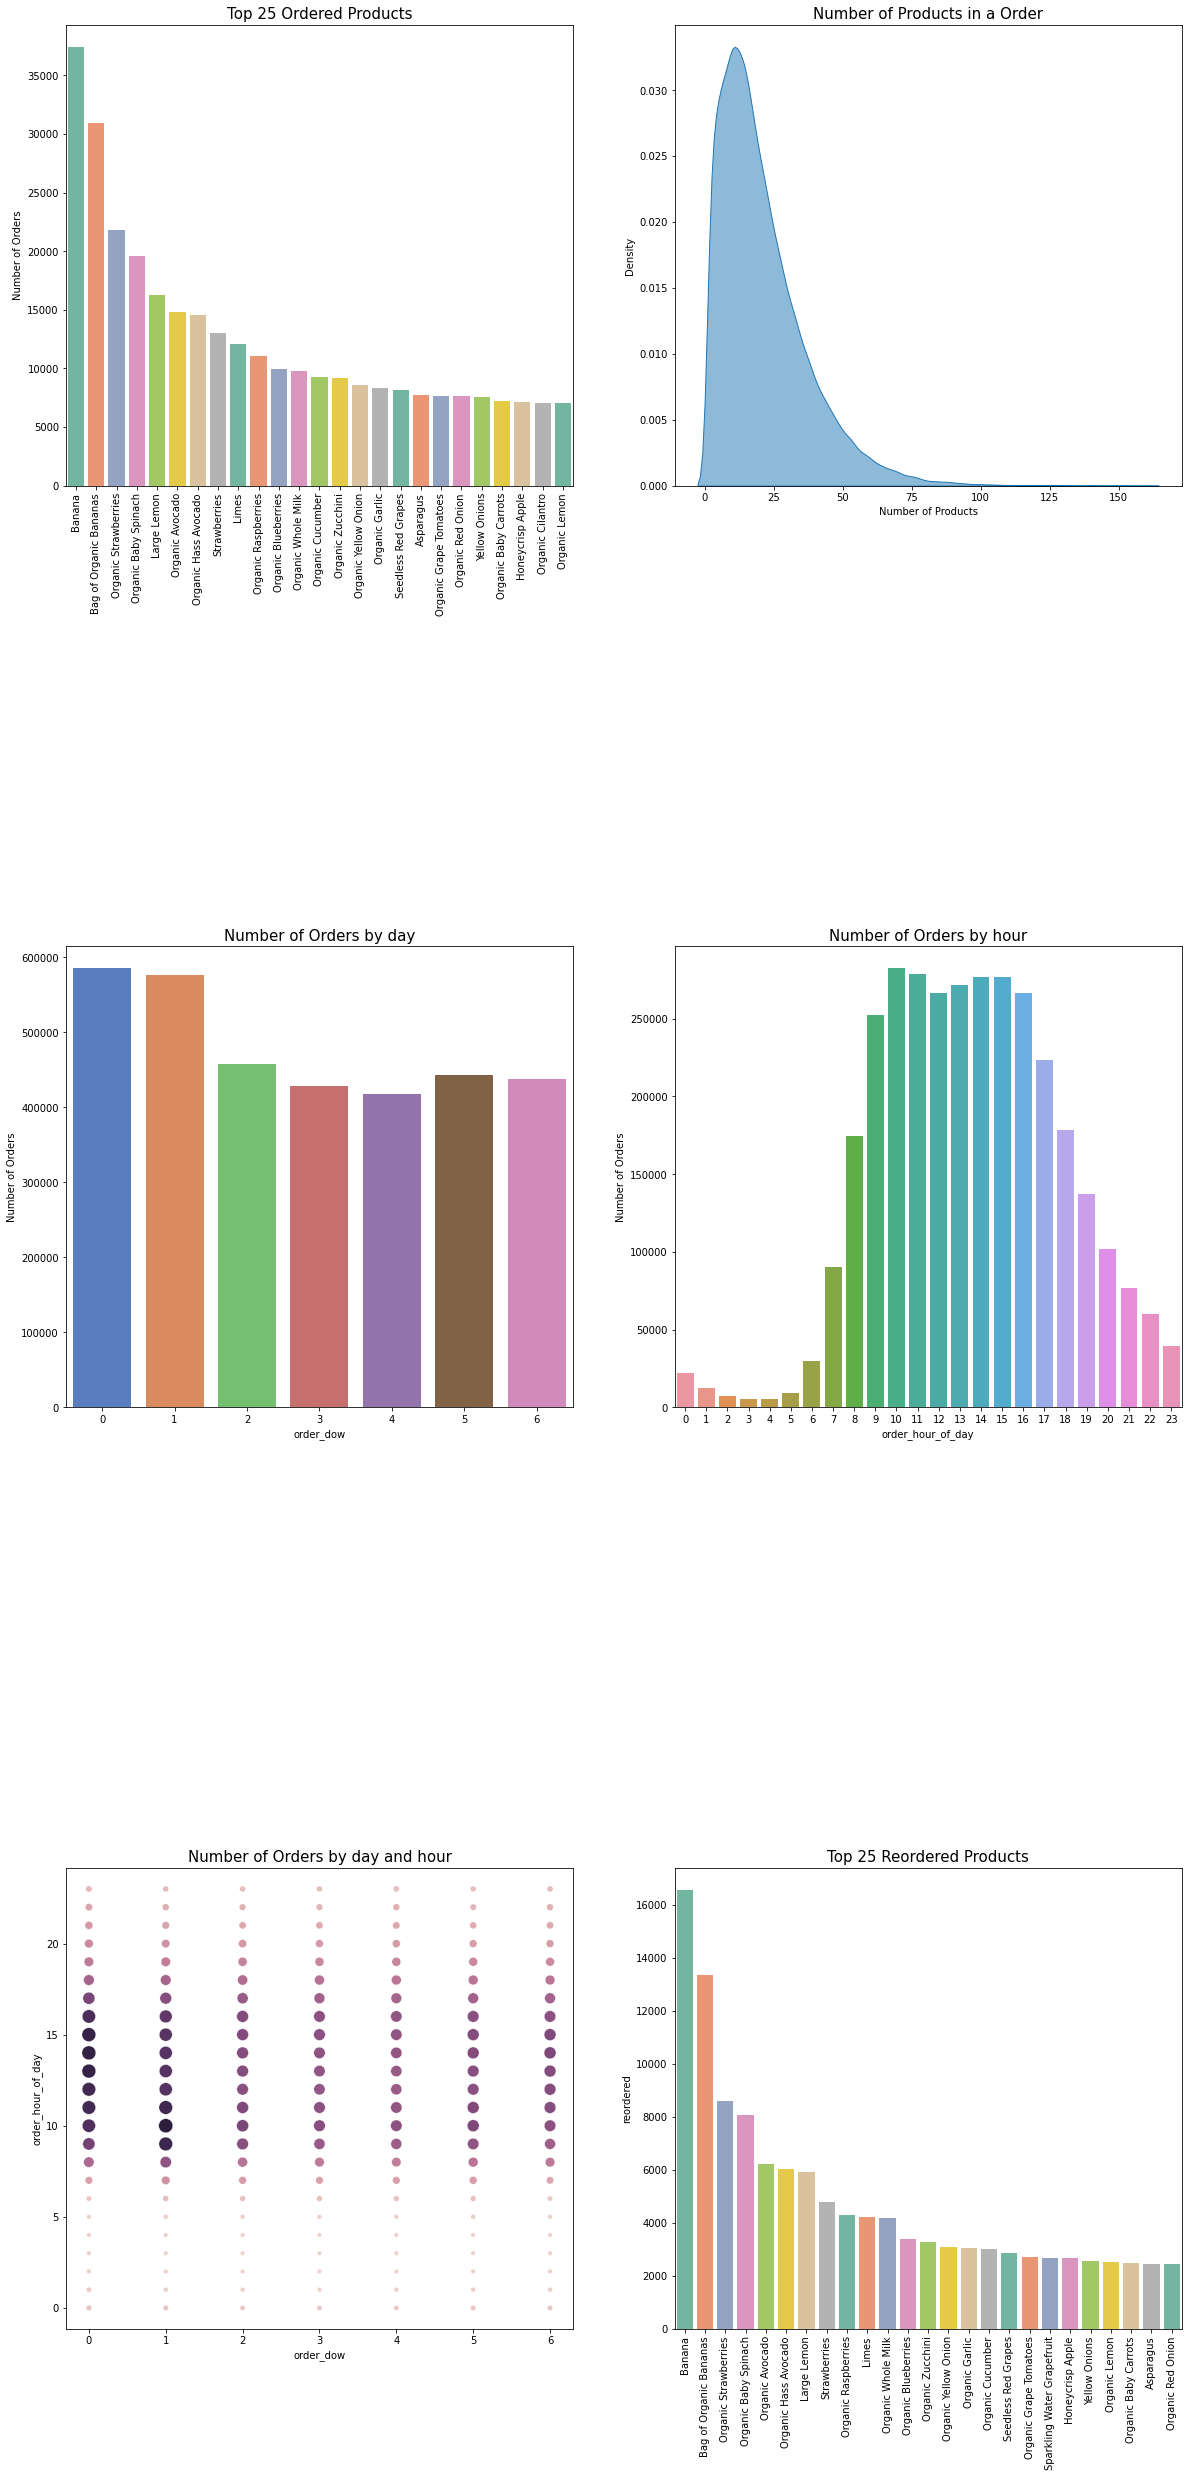

In [ ]:
# 1. orders
# > Most ordered products
# > Number of products in one order
# > Trend of Orders by day and time

fig, ax = plt.subplots(3,2, figsize=(20,40))

# Plot 1
orders_products = pd.merge(pd.concat([all_dfs['order_products__train'], all_dfs['order_products__train']]),all_dfs['products'],how="left",on="product_id")
data = orders_products.groupby(['product_id','product_name']).size().reset_index(name='Number of Orders').sort_values(by='Number of Orders', ascending=False)
data = data.head(25)

ax[0,0] = CreateCharts(ax[0,0], data, "product_name", "Number of Orders", "bar", palette = "Set2")
ax[0,0].set_xticklabels(data['product_name'], rotation = 90)
ax[0,0].set_title('Top 25 Ordered Products', fontsize=15)
ax[0,0].set_xlabel('')

# Plot 2
data = orders_products.groupby('order_id').size().reset_index(name='Number of Products').sort_values(by='Number of Products', ascending=False)
ax[0,1] = CreateCharts(ax[0,1], data, x = "Number of Products", y=None, chart_type = "density")
ax[0,1].set_title('Number of Products in a Order', fontsize=15)


# Plot 3
ax[1,0] = CreateCharts(ax[1,0], 
            all_dfs['orders'][all_dfs['orders']['eval_set']!='test'].groupby('order_dow').size().reset_index(name='Number of Orders'),
            "order_dow", "Number of Orders", "bar", palette = 'muted')
ax[1,0].set_title('Number of Orders by day', fontsize=15)

# Plot 4
ax[1,1] = CreateCharts(ax[1,1], 
            all_dfs['orders'][all_dfs['orders']['eval_set']!='test'].groupby('order_hour_of_day').size().reset_index(name='Number of Orders'),
            "order_hour_of_day", "Number of Orders", "bar", palette = None)
ax[1,1].set_title('Number of Orders by hour', fontsize=15)


# Plot 5
ax[2,0] = CreateCharts(ax[2,0],
    all_dfs['orders'][all_dfs['orders']['eval_set']!='test'].groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='orders'),
    "order_dow", "order_hour_of_day", "scatter", legend=False, size="orders", hue = "orders")
ax[2,0].set_title('Number of Orders by day and hour', fontsize=15)

# Plot 6
data = pd.merge(all_dfs['order_products__train'].groupby('product_id')['reordered'].sum().sort_values(ascending=False),
         all_dfs['products'],how="left",on="product_id")
ax[2,1] = CreateCharts(ax[2,1], data.head(25), "product_name", "reordered", "bar", palette = "Set2")
ax[2,1].set_xticklabels(data.head(25)['product_name'], rotation = 90)
ax[2,1].set_title('Top 25 Reordered Products', fontsize=15)
ax[2,1].set_xlabel('')

#  2. reorders
# > How many current orders (train set) are also previously ordered (prior orders)
# > products which are most likely to be reordered, is there any trend in reorders vs orders
# > Number of orders and period of reorders

# 3. aisles
# > Number of products in each aisle
# > Number of orders in each aisle (combine this with above?)
# > dow and hour of day for aisle
# > reorder period for each aisle, most reorders by each aisle
# > are the products from the same aisle ordered together

# 4. departments
# > Number of products in each dept
# > Number of orders in each dept (combine this with above?)
# > dow and hour of day for dept
# > reorder period for each dept, most reorders by each dept
# > are the products from the same dept ordered together

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=1)

plt.show()

<br>
<br>

### Make a slide showing insights of each chart for blog

## 3. Data Cleaning

what are the different types of checks in cleaning

* identify missings
* identify outliers
* check for overall plausibility and errors (e.g, typos)
* identify highly correlated variables
* identify variables with (nearly) no variance
* identify variables with strange names or values
* check variable classes (eg. characters vs factors)
* remove/transform some variables (maybe your model does not like categorial variables)
* rename some variables or values (especially interesting if large number)
* check some overall pattern (statistical/ numerical summaries)
* center/scale variables

## 4. Data Wrangling

convert data to a format which you can use in segmentation modelling - makes it easy

## 5. Feature Engineering

add any new variables you'd like to use -- like the ones above or RFM or use PCA to create new features

can use random forest here?

In [ ]:
# User Features
# Product Features
# Time Features
# User-Product Features

## 5b Feature Selection?

## 6. Modelling

1. select model - supervised vs unsupervised
2. hyperpamarters? what other decisions?

#### do you need to define an objective function?

objective based segmentation vs not


#### how to select a model 101?

### given the conditions - I selected to use k-means

In [ ]:
# STEP 1: Select value of k

In [ ]:
# STEP 2: Select features - can do PCA or RFM

In [ ]:
# STEP 3: k means implementation in AWS

## 7. Narrative

## 8. Predict

## Bonus!

1. when and how to use supervised learning in Segmentaiton
2. how to use objective function
3. XGBOOST